# Module Importing

In [182]:
import pandas as pd
import scipy.stats
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import ooc_biosensing_binding_assay_analysis

# Tabulating Data

## Importing

In [183]:
path = "/Users/vinny/Sync/Main/Research/Project Work/Experimental/Biosensor/Organ-On-Chip Biosensing/Pre-Pilot In-Well Characterization/Phase I/Trial IV"

layout = pd.read_csv(path + "/plate_layout.csv")
data = pd.read_csv(path + "/raw_data.csv")

In [184]:
layout

,Unnamed: 0,1,2,3,4,5,6,7,8,9
0,A,N-Z,N-Z,N-Z,L-Z,L-Z,L-Z,H-Z,H-Z,H-Z
1,B,N-R-1,N-R-1,N-R-1,L-R-1,L-R-1,L-R-1,H-R-1,H-R-1,H-R-1
2,C,N-R-2,N-R-2,N-R-2,L-R-2,L-R-2,L-R-2,H-R-2,H-R-2,H-R-2
3,D,N-TO-1,N-TO-1,N-TO-1,L-TO-1,L-TO-1,L-TO-1,H-TO-1,H-TO-1,H-TO-1
4,E,N-TO-2,N-TO-2,N-TO-2,L-TO-2,L-TO-2,L-TO-2,H-TO-2,H-TO-2,H-TO-2
5,F,N-TN-1,N-TN-1,N-TN-1,L-TN-1,L-TN-1,L-TN-1,H-TN-1,H-TN-1,H-TN-1
6,H,N-TN-2,N-TN-2,N-TN-2,L-TN-2,L-TN-2,L-TN-2,H-TN-2,H-TN-2,H-TN-2
7,G,N-TN-3,N-TN-3,N-TN-3,L-TN-3,L-TN-3,L-TN-3,H-TN-3,H-TN-3,H-TN-3


In [185]:
data

,Unnamed: 0,1,2,3,4,5,6,7,8,9
0,A,0.0035,0.0024,0.0029,0.0029,0.0034,0.0048,0.0064,0.0050,0.0224
1,B,0.0301,0.0290,0.0269,2.8815,2.8240,2.7062,3.9031,3.8984,3.8433
2,C,0.0354,0.0320,0.0316,3.2338,3.1574,3.2287,3.9089,3.9058,3.9140
3,D,0.0119,0.0095,0.0091,0.5104,0.4975,0.4813,1.0100,1.0328,1.0162
4,E,0.0192,0.0149,0.0148,0.5205,0.5299,0.4821,1.0192,1.0346,1.0544
5,F,0.0770,0.0735,0.0630,2.5792,2.5627,2.4822,3.2518,3.2614,3.3099
6,H,0.1160,0.1132,0.1151,3.5195,3.5044,3.5738,3.9091,3.8993,3.9131
7,G,0.1539,0.1535,0.1437,3.9054,3.8741,3.9108,3.8868,3.8866,3.8847


## Blanking

In [186]:
data.iloc[1:, 1:4] -= data.iloc[0, 1:4].mean()
data.iloc[1:, 4:7] -= data.iloc[0, 4:7].mean()
data.iloc[1:, 7:10] -= data.iloc[0, 7:10].mean()

In [187]:
layout.drop(labels=0, axis=0, inplace=True)
data.drop(labels=0, axis=0, inplace=True)

layout.reset_index(drop=True, inplace=True)
data.reset_index(drop=True, inplace=True)

## Categorizing

In [188]:
readout = 'Absorbance (p.d.u.)'
experimental_identifier = 'Pre-Pilot Phase I Trial IV'

In [189]:
import json

conditions_mapping = {'N': ("Antigen Concentration (pg/mL)", 0),
                      'L': ("Antigen Concentration (pg/mL)", 500),
                      'H': ("Antigen Concentration (pg/mL)", 2000),
                      'R': ('Streptavidin-HRP Source', 'R & D'),
                      'TO': ('Streptavidin-HRP Source', 'Thermo Original'),
                      'TN': ('Streptavidin-HRP Source', 'Thermo New'),
                      '1': ('Streptavidin-HRP Concentration (ng/mL)', 22.5),
                      '2': ('Streptavidin-HRP Concentration (ng/mL)', 45),
                      '3': ('Streptavidin-HRP Concentration (ng/mL)', 90),
                      }

with open(path+'/conditions_mapping.txt', 'w') as file:
     file.write(json.dumps(conditions_mapping))

In [190]:
organized_data = ooc_biosensing_binding_assay_analysis.categorize_assay_data(layout, data, conditions_mapping, readout, experimental_identifier, path)

# Visualizing Data

## Comparing Protein Sources at Equal Concentrations

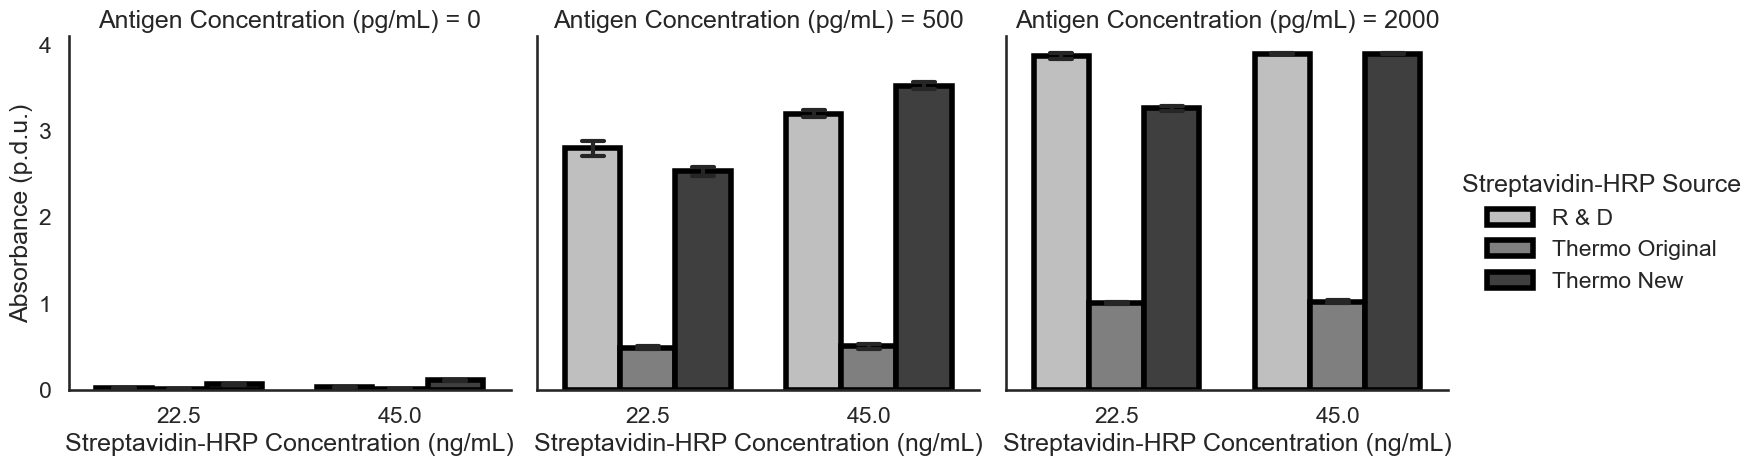

In [191]:
sns.set_theme(style='white', context='talk')
sns.catplot(kind='bar', data=organized_data[organized_data['Streptavidin-HRP Concentration (ng/mL)'] != 90], 
            x = 'Streptavidin-HRP Concentration (ng/mL)', y = 'Absorbance (p.d.u.)', hue='Streptavidin-HRP Source', col='Antigen Concentration (pg/mL)', 
            errorbar='sd', palette = 'binary', errcolor='.15', errwidth=3, capsize=.1, edgecolor="0", linewidth=4, width=0.75)
plt.savefig(path+'/Figure_Source.svg')

## Comparing Concentrations of the New Protein

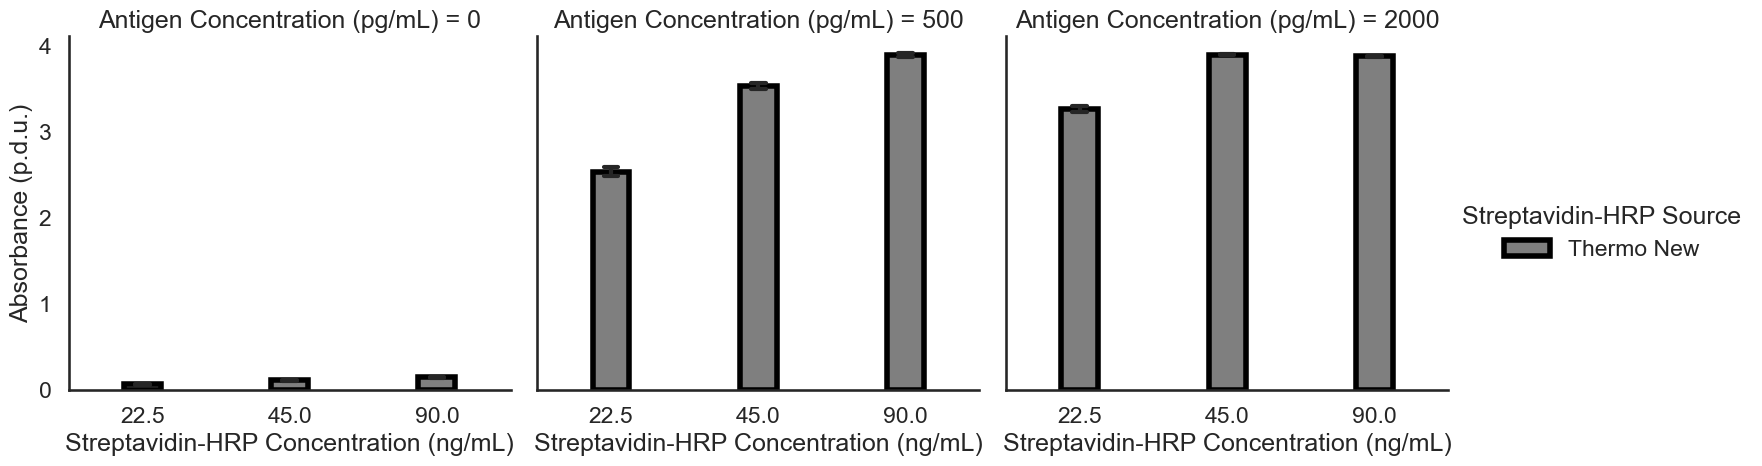

In [192]:
sns.set_theme(style='white', context='talk')
sns.catplot(kind='bar', data=organized_data[organized_data['Streptavidin-HRP Source'] == 'Thermo New'], 
            x = 'Streptavidin-HRP Concentration (ng/mL)', y = 'Absorbance (p.d.u.)', hue='Streptavidin-HRP Source', col='Antigen Concentration (pg/mL)', 
            errorbar='sd', palette = 'binary', errcolor='.15', errwidth=3, capsize=.1, edgecolor="0", linewidth=4, width=0.25)
plt.savefig(path+'/Figure_Concentration.svg')

# Analyzing Data

We'll break down the data into antigen concentration groupings and assess each streptavidin-HRP concentration within those groups separately using a one-way ANOVA (under the assumption the data are normally distributed) and, if applicable, Bartlett's test followed by the appropriate post-hoc.  The same process will be followed to assess the relationship between concentration and signal for the new protein source. 

In [193]:
ag_grouping = organized_data[(organized_data['Antigen Concentration (pg/mL)'] == 0)].groupby(['Streptavidin-HRP Source', 'Streptavidin-HRP Concentration (ng/mL)'])

## ANOVA for Protein Source Comparison

In [194]:
scipy.stats.f_oneway(ag_grouping.get_group(('R & D', 22.5))['Absorbance (p.d.u.)'], 
                     ag_grouping.get_group(('Thermo Original', 22.5))['Absorbance (p.d.u.)'], 
                     ag_grouping.get_group(('Thermo New', 22.5))['Absorbance (p.d.u.)'])

F_onewayResult(statistic=151.7450879007245, pvalue=7.286402334409062e-06)

In [195]:
scipy.stats.bartlett(ag_grouping.get_group(('R & D', 22.5))['Absorbance (p.d.u.)'], 
                     ag_grouping.get_group(('Thermo Original', 22.5))['Absorbance (p.d.u.)'], 
                     ag_grouping.get_group(('Thermo New', 22.5))['Absorbance (p.d.u.)'])

BartlettResult(statistic=5.093372215694446, pvalue=0.07834084943717408)

In [196]:
print(scipy.stats.tukey_hsd(ag_grouping.get_group(('R & D', 22.5))['Absorbance (p.d.u.)'], 
                            ag_grouping.get_group(('Thermo Original', 22.5))['Absorbance (p.d.u.)'], 
                            ag_grouping.get_group(('Thermo New', 22.5))['Absorbance (p.d.u.)']))

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.018     0.005     0.007     0.030
 (0 - 2)     -0.042     0.000    -0.054    -0.031
 (1 - 0)     -0.018     0.005    -0.030    -0.007
 (1 - 2)     -0.061     0.000    -0.072    -0.050
 (2 - 0)      0.042     0.000     0.031     0.054
 (2 - 1)      0.061     0.000     0.050     0.072



The 22.5 ng/mL streptavidin-HRP group appears to have significant differences across the three protein sources assessed.

In [197]:
scipy.stats.f_oneway(ag_grouping.get_group(('R & D', 45))['Absorbance (p.d.u.)'], 
                     ag_grouping.get_group(('Thermo Original', 45))['Absorbance (p.d.u.)'], 
                     ag_grouping.get_group(('Thermo New', 45))['Absorbance (p.d.u.)'])

F_onewayResult(statistic=1965.6955951758093, pvalue=3.5385721522719673e-09)

In [198]:
scipy.stats.bartlett(ag_grouping.get_group(('R & D', 45))['Absorbance (p.d.u.)'], 
                     ag_grouping.get_group(('Thermo Original', 45))['Absorbance (p.d.u.)'], 
                     ag_grouping.get_group(('Thermo New', 45))['Absorbance (p.d.u.)'])

BartlettResult(statistic=0.49569851996850317, pvalue=0.7804775836145038)

In [199]:
print(scipy.stats.tukey_hsd(ag_grouping.get_group(('R & D', 45))['Absorbance (p.d.u.)'], 
                            ag_grouping.get_group(('Thermo Original', 45))['Absorbance (p.d.u.)'], 
                            ag_grouping.get_group(('Thermo New', 45))['Absorbance (p.d.u.)']))

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.017     0.000     0.012     0.022
 (0 - 2)     -0.082     0.000    -0.087    -0.077
 (1 - 0)     -0.017     0.000    -0.022    -0.012
 (1 - 2)     -0.098     0.000    -0.104    -0.093
 (2 - 0)      0.082     0.000     0.077     0.087
 (2 - 1)      0.098     0.000     0.093     0.104



The 45 ng/mL streptavidin-HRP group appears to have significant differences across the three protein sources assessed.

## ANOVA for Concentration Comparison

In [200]:
scipy.stats.f_oneway(ag_grouping.get_group(('Thermo New', 22.5))['Absorbance (p.d.u.)'], ag_grouping.get_group(('Thermo New', 45))['Absorbance (p.d.u.)'], ag_grouping.get_group(('Thermo New', 90))['Absorbance (p.d.u.)'])

F_onewayResult(statistic=160.01627118644214, pvalue=6.232623594128903e-06)

In [201]:
scipy.stats.bartlett(ag_grouping.get_group(('Thermo New', 22.5))['Absorbance (p.d.u.)'], ag_grouping.get_group(('Thermo New', 45))['Absorbance (p.d.u.)'], ag_grouping.get_group(('Thermo New', 90))['Absorbance (p.d.u.)'])

BartlettResult(statistic=3.2055842373998398, pvalue=0.20133358520461397)

In [205]:
print(scipy.stats.tukey_hsd(ag_grouping.get_group(('Thermo New', 22.5))['Absorbance (p.d.u.)'], ag_grouping.get_group(('Thermo New', 45))['Absorbance (p.d.u.)'], ag_grouping.get_group(('Thermo New', 90))['Absorbance (p.d.u.)']))

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.044     0.000    -0.057    -0.030
 (0 - 2)     -0.079     0.000    -0.093    -0.066
 (1 - 0)      0.044     0.000     0.030     0.057
 (1 - 2)     -0.036     0.000    -0.049    -0.022
 (2 - 0)      0.079     0.000     0.066     0.093
 (2 - 1)      0.036     0.000     0.022     0.049



## Saving a Data Summary

In [203]:
organized_data.groupby(['Antigen Concentration (pg/mL)', 'Streptavidin-HRP Source', 'Streptavidin-HRP Concentration (ng/mL)']).describe().to_csv(path + '/Data_Summary.csv')